In [482]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [483]:
def cat_codes(df, column, new_column):
    for column in df.columns:
        if df[column].dtype == 'category':
            df[new_column] = df[column].cat.codes
    return df

def int_values(df, column_name):
    df[column_name] = abs(df[column_name].round().astype(int))
    return df

In [484]:
shows = pd.read_csv("YFBP all eps.csv")

In [485]:
front_half_shows = shows.loc[shows["Episode"] >= 50]
back_half_shows = shows.loc[shows["Episode"] <= 51]

In [486]:
views = shows.set_index("Views").sort_index(ascending=False)
views

,Episode,Title,Length,Ep_Set,Guest
Views,,,,,
10555,100,MASTERPLAN,81,10,Y
6520,31,BABY,29,4,Y
5846,104,BEAT THE SUN,53,11,N
5760,108,BIG ZOO,45,11,N
5755,103,Landlord,61,11,N
...,...,...,...,...,...
673,94,Tory Lanez: What Really Happened?,56,10,N
632,97,Alex Murdaugh Pt. II,37,10,N
461,86,Low Vibrations,25,9,N


In [487]:
shows[["Views"]].sum()

Views    213366
dtype: int64

In [488]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Episode  100 non-null    int64 
 1   Title    100 non-null    object
 2   Length   100 non-null    int64 
 3   Views    100 non-null    int64 
 4   Ep_Set   100 non-null    int64 
 5   Guest    100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [489]:
shows.describe()

,Episode,Length,Views,Ep_Set
count,100.000000,100.000000,100.000000,100.000000
mean,57.000000,31.290000,2133.660000,6.140000
std,29.669901,12.094155,1531.650217,2.981492
min,7.000000,11.000000,65.000000,1.000000
25%,31.750000,24.000000,1378.500000,4.000000
50%,56.500000,28.000000,1789.500000,6.000000
75%,81.750000,36.000000,2289.500000,9.000000
max,108.000000,81.000000,10555.000000,11.000000


In [490]:
shows[shows['Views'] >= 5000]

,Episode,Title,Length,Views,Ep_Set,Guest
24,31,BABY,29,6520,4,Y
91,100,MASTERPLAN,81,10555,10,Y
92,101,Unmasking Controversy,42,5213,11,N
93,102,DUI/ Brawls/ & Backlash,66,5293,11,Y
94,103,Landlord,61,5755,11,N
95,104,BEAT THE SUN,53,5846,11,N
97,106,We Might Get Hit With The R.I.C.O Pt. II,42,5404,11,N
99,108,BIG ZOO,45,5760,11,N


In [491]:
shows.groupby("Ep_Set")["Views"].sum()

Ep_Set
1      9794
2     15546
3     21265
4     23722
5     18372
6     18145
7     22182
8     17302
9      8233
10    16912
11    41893
Name: Views, dtype: int64

In [492]:
shows.isnull().sum()

Episode    0
Title      0
Length     0
Views      0
Ep_Set     0
Guest      0
dtype: int64

In [493]:
first = np.quantile(shows['Views'], .25).round().astype(int)
second = np.quantile(shows['Views'], .50).round().astype(int)
third = np.quantile(shows['Views'], .75).round().astype(int)
max = shows['Views'].max()
[first, second, third, max]

[1378, 1790, 2290, 10555]

In [494]:
colors, sizes, quantile = [], [], []
# Iterate over rows of shows
for lab, row in shows.iterrows():
    if row['Views'] <= first:
        colors.append("red")
        sizes.append(25)
        quantile.append("1st")
    elif third > row['Views'] <= second:
        colors.append("blue")
        sizes.append(50)
        quantile.append("2nd")
    elif max > row['Views'] <= third:
        colors.append("green")
        sizes.append(75)
        quantile.append("3rd")
    elif row['Views'] == max:
        colors.append("gold")
        sizes.append(100)
        quantile.append("max")
    else:
        colors.append("green")
        sizes.append(75)
        quantile.append("4th")

shows['visual_color'] = colors
shows['visual_size'] = sizes
shows['views_quantile'] = quantile

In [495]:
shows.views_quantile.value_counts()

views_quantile
3rd    25
1st    25
2nd    25
4th    24
max     1
Name: count, dtype: int64

<Axes: xlabel='Episode', ylabel='Views'>

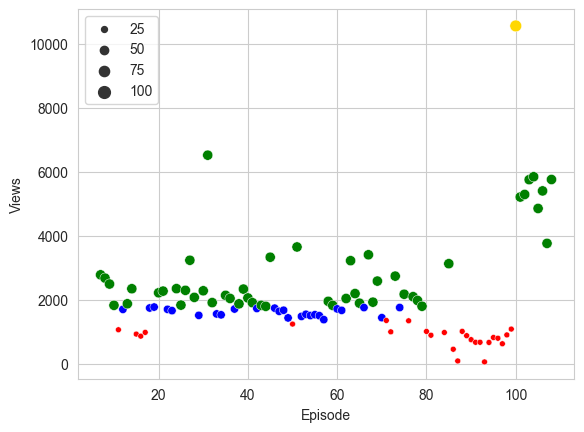

In [496]:
sns.scatterplot(x="Episode", y="Views", data=shows, color=colors, size=sizes)

In [497]:
shows.views_quantile = shows.views_quantile.astype('category')
shows.Guest = shows.Guest.astype('category')
shows.Title = shows.Title.astype('string')
shows['title_length'] = shows['Title'].str.len().astype('int')

In [498]:
shows = cat_codes(shows, 'Guest', 'guest_codes')
shows = cat_codes(shows, 'views_quantile', 'quantile_codes')
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Episode         100 non-null    int64   
 1   Title           100 non-null    string  
 2   Length          100 non-null    int64   
 3   Views           100 non-null    int64   
 4   Ep_Set          100 non-null    int64   
 5   Guest           100 non-null    category
 6   visual_color    100 non-null    object  
 7   visual_size     100 non-null    int64   
 8   views_quantile  100 non-null    category
 9   title_length    100 non-null    int32   
 10  guest_codes     100 non-null    int8    
 11  quantile_codes  100 non-null    int8    
dtypes: category(2), int32(1), int64(5), int8(2), object(1), string(1)
memory usage: 6.7+ KB


In [499]:
samples = shows.sample(frac=1/2, replace=False)
samples

,Episode,Title,Length,Views,Ep_Set,Guest,visual_color,visual_size,views_quantile,title_length,guest_codes,quantile_codes
74,81,No Hands,34,898,9,N,red,25,1st,8,0,0
28,35,Dine and Dash,23,2144,4,N,green,75,3rd,13,2,2
55,62,Divorce,20,2045,7,N,green,75,3rd,7,2,2
66,73,Alcoholic,39,2744,8,N,green,75,4th,9,3,3
97,106,We Might Get Hit With The R.I.C.O Pt. II,42,5404,11,N,green,75,4th,40,3,3
5,12,EVOL,15,1706,2,Y,blue,50,2nd,4,1,1
41,48,BROKE & PREGNANT,20,1679,5,N,blue,50,2nd,16,1,1
83,92,Chrisley Doesn’t Know Best,24,678,10,N,red,25,1st,26,0,0
56,63,WHO IS REEF,28,3226,7,Y,green,75,4th,11,3,3
37,44,Fights,27,1801,5,N,green,75,3rd,6,2,2


In [500]:
from statsmodels.formula.api import ols
mdl_views_v_guests = ols('Views ~ Length', data=samples).fit()
mdl_views_v_guests.params

Intercept    -6.627374
Length       74.365474
dtype: float64

In [501]:
explanatory_data = pd.DataFrame({'Length': np.arange(shows.Length.min(), shows.Length.max(), len(samples) / 10)})

In [502]:
prediction_data = explanatory_data.assign(Views = mdl_views_v_guests.predict(explanatory_data))
prediction_data = int_values(prediction_data, 'Views')
prediction_data.Views

0      811
1     1183
2     1555
3     1927
4     2299
5     2671
6     3042
7     3414
8     3786
9     4158
10    4530
11    4901
12    5273
13    5645
Name: Views, dtype: int32

In [503]:
prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Length  14 non-null     float64
 1   Views   14 non-null     int32  
dtypes: float64(1), int32(1)
memory usage: 296.0 bytes


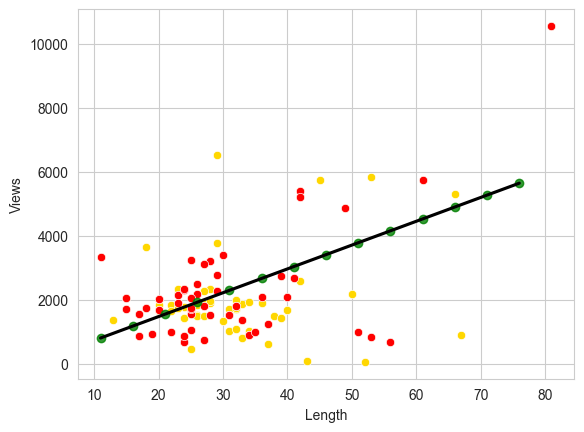

In [504]:
fig = plt.figure()
sns.set_style('whitegrid')
sns.scatterplot(x="Length", y="Views", data=shows, color='gold')

sns.scatterplot(x="Length", y="Views", data=samples, color='red')


sns.regplot(x="Length", y="Views", data=prediction_data, ci=0.95, line_kws={"color": "black"}, color='green')
plt.legend
plt.show()